In [1]:
#Importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Loading and displaying the dataset

df = pd.read_csv('Netflix_stock_data.csv')

In [3]:
df.head(3)

,Date,Close,High,Low,Open,Volume
0,2002-05-23,1.196429,1.242857,1.145714,1.156429,104790000
1,2002-05-24,1.210000,1.225000,1.197143,1.214286,11104800
2,2002-05-28,1.157143,1.232143,1.157143,1.213571,6609400


In [4]:
df.tail(3)

,Date,Close,High,Low,Open,Volume
5828,2025-07-23,1176.780029,1192.619995,1173.599976,1189.810059,4504300
5829,2025-07-24,1180.760010,1183.500000,1162.660034,1177.800049,3845600
5830,2025-07-25,1180.489990,1187.319946,1174.380005,1178.420044,2626000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5831 entries, 0 to 5830
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5831 non-null   object 
 1   Close   5831 non-null   float64
 2   High    5831 non-null   float64
 3   Low     5831 non-null   float64
 4   Open    5831 non-null   float64
 5   Volume  5831 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 273.5+ KB


In [6]:
df.describe()

,Close,High,Low,Open,Volume
count,5831.000000,5831.000000,5831.000000,5831.000000,5.831000e+03
mean,178.178916,180.724004,175.462560,178.101178,1.509596e+07
std,246.330012,249.461237,242.905469,246.172425,1.834508e+07
min,0.372857,0.410714,0.346429,0.377857,2.856000e+05
25%,4.324286,4.420000,4.235714,4.324286,5.360100e+06
50%,47.779999,48.500000,46.945713,47.820000,9.322500e+06
75%,321.424988,327.654999,316.689987,322.345001,1.798410e+07
max,1339.130005,1341.150024,1321.209961,1338.229980,3.234140e+08


In [7]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [8]:
df.shape

(5831, 6)

In [9]:
#Handling missing values

df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [10]:
#Converting 'Date' column to datetime format and sorting the dataframe by date

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

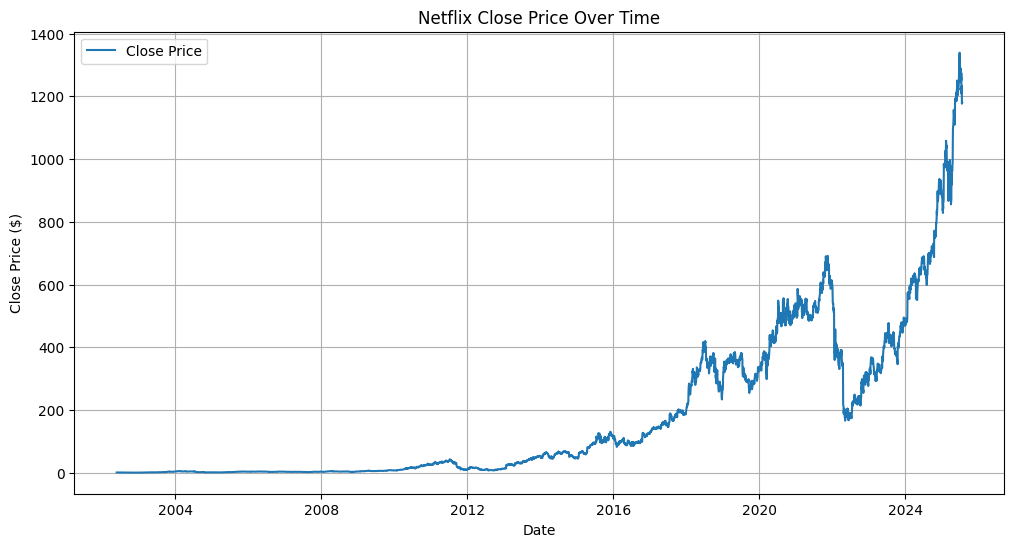

In [11]:
#Visualizing stock prize trends

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Netflix Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
#Feature Engineering

# Create daily return

df['Return'] = df['Close'].pct_change()

# Create moving averages

df['MA7'] = df['Close'].rolling(window=7).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

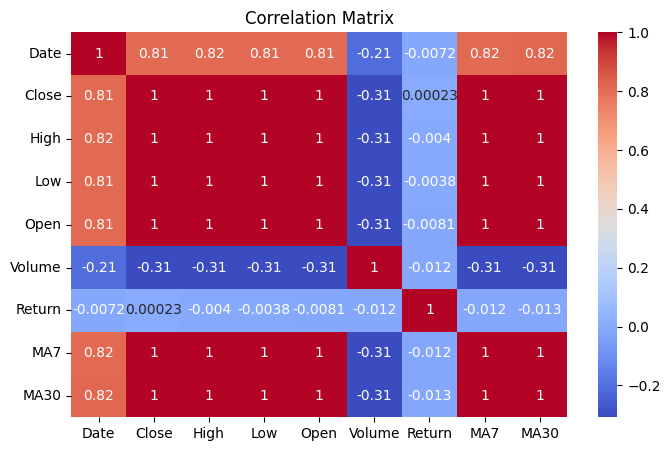

In [13]:
#Correlation Analysis

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
#Importing libraries for model

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [15]:
data = df[['Close']]

In [16]:
#Normalizing the data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [17]:
#Creating a sequence for LSTM

sequence_length = 60
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape for LSTM input

X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [18]:
#Splitting the dataset fot training and testing

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [19]:
#Building the LSTM model

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
#Train the model

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0019 - val_loss: 5.9357e-04
Epoch 2/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 2.0036e-04 - val_loss: 9.8624e-04
Epoch 3/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.6207e-04 - val_loss: 0.0016
Epoch 4/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4290e-04 - val_loss: 0.0014
Epoch 5/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.6234e-04 - val_loss: 5.5012e-04
Epoch 6/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.3827e-04 - val_loss: 6.9761e-04
Epoch 7/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1412e-04 - val_loss: 6.1452e-04
Epoch 8/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.2984e-04 - val_loss: 0.0013
Epoch 9/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.5303e-04 - val_loss: 5.7582e-04
Epoch 10/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.4282e-04 - val_loss: 9.3952e-04
Epoch 11/20
145/145 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.1082e-04

In [21]:
#Predictions

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


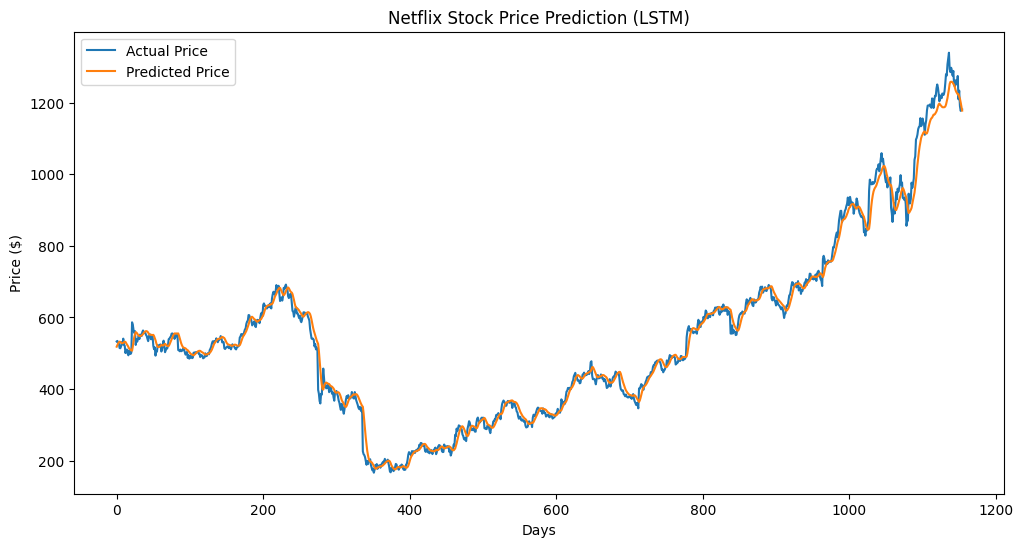

In [22]:
#Plotting Actual price vs Predicted price

plt.figure(figsize=(12,6))
plt.plot(y_test_scaled, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Netflix Stock Price Prediction (LSTM)')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.show()